Fill in the missing code (#####) to use a NN to define a ridge regression. Check for questions at the bottom of the file. For documentation use: https://faroit.com/keras-docs/

Compatibility issues:
compatibility issues may arise depending on the version of keras and tensor flow that is installed
if you install the same keras and tensorflow as listed below, they should disappear:

In [1]:
#Name                    Version                   Build  Channel
#python 3.7.9
#keras                     2.2.4                         0
#tensorflow                1.15.0          eigen_py37h9f89a44_0
#tensorflow-base           1.15.0          eigen_py37h07d2309_0
#tensorflow-estimator      1.15.1             pyh2649769_0

For Error: 'tensorflow.python.framework.ops' has no attribute '_TensorLike'. See:
https://stackoverflow.com/questions/53135439/issue-with-add-method-in-tensorflow-attributeerror-module-tensorflow-python

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import keras

In [3]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 218us/step - loss: 1.2951 - val_loss: 0.5457
Epoch 2/100
500/500 [==============================] - 0s 72us/step - loss: 0.2969 - val_loss: 0.1649
Epoch 3/100
500/500 [==============================] - 0s 72us/step - loss: 0.0940 - val_loss: 0.0603
Epoch 4/100
500/500 [==============================] - 0s 72us/step - loss: 0.0393 - val_loss: 0.0305
Epoch 5/100
500/500 [==============================] - 0s 86us/step - loss: 0.0240 - val_loss: 0.0215
Epoch 6/100
500/500 [==============================] - 0s 70us/step - loss: 0.0193 - val_loss: 0.0186
Epoch 7/100
500/500 [==============================] - 0s 70us/step - loss: 0.0179 - val_loss: 0.0176
Epoch 8/100
500/500 [==============================] - 0s 64us/step - loss: 0.0173 - val_loss: 0.0172
Epoch 9/100
500/500 [==============================] - 0s 57us/step - loss: 0.0171 - val_loss: 0.0171
Epoch 10/100
500/500 [=============

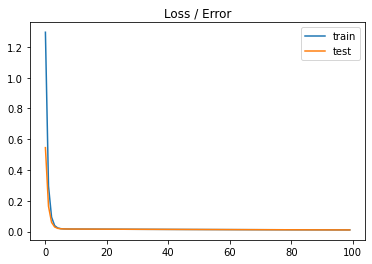

In [7]:
# ridge with scaled inputs outputs on the regression problem
# define model
model = Sequential()#####
#model.add(Dense(1, input_dim=20, activation= None, )) #####
model.add(Dense(25,input_dim=num_features, activation= None))
model.add(Dense(1,input_dim=num_features,activation='linear',kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.1)))
##### as many as needed
#compile the model
model.compile(loss="mean_squared_error",optimizer =SGD(lr=0.01, momentum=0.9))
#####
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e, test_e)) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

How to you change the ridge regression to a lasso regression?

For Documentation see:
https://archive.ph/DcLvJ
https://www.youtube.com/watch?v=xyymDGReKdY&ab_channel=JeffHeaton
The provided example uses the Keras functional model, whereas 
the answer I will provide uses the Keras sequential model, 
so you will get both versions.